San Francisco AirBnB Project following the CRISP-DM process

1. Business Understanding
    Which neighborhoods have the highest rating scores?
    Which are the most common property types in San Francisco?
    What factors affect the listings prices in San Francisco?


2. Data Understanding

In [17]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
#checking working directory
pwd

'C:\\Users\\Vizio'

In [20]:
#reading the .csv data
SF_Data = pd.read_csv(r"D:\Udacity\San_Francisco\SF_listings.csv")

In [21]:
#Number of rows and columns
SF_Data.shape

(8111, 106)

In [22]:
#List of Column names
SF_Data.columns.values.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',


In [24]:
SF_Data.head

<bound method NDFrame.head of             id                            listing_url     scrape_id  \
0          958       https://www.airbnb.com/rooms/958  2.019100e+13   
1         3850      https://www.airbnb.com/rooms/3850  2.019100e+13   
2         5858      https://www.airbnb.com/rooms/5858  2.019100e+13   
3         7918      https://www.airbnb.com/rooms/7918  2.019100e+13   
4         8142      https://www.airbnb.com/rooms/8142  2.019100e+13   
...        ...                                    ...           ...   
8106  39342094  https://www.airbnb.com/rooms/39342094  2.019100e+13   
8107  39343373  https://www.airbnb.com/rooms/39343373  2.019100e+13   
8108  39344101  https://www.airbnb.com/rooms/39344101  2.019100e+13   
8109  39350028  https://www.airbnb.com/rooms/39350028  2.019100e+13   
8110  39354181  https://www.airbnb.com/rooms/39354181  2.019100e+13   

     last_scraped                                               name  \
0        10/14/19                Bright, Mode

3. Data Preparation

In [26]:
#Checking for missing values
SF_Data.isnull().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
name                                               0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               1605
Length: 106, dtype: int64

Q1. Types of properties available

Q1.1 Data Understanding and Prepartion and Results

In [71]:
#number of missing values in column property_type
SF_Data['property_type'].isna().sum()

0

In [27]:
#finding the Frequency of property type 
pd.crosstab(index=SF_Data["property_type"], columns="Frequency")

col_0,Frequency
property_type,
Aparthotel,41
Apartment,3243
Bed and breakfast,43
Boutique hotel,267
Bungalow,17
Cabin,3
Camper/RV,1
Castle,4
Condominium,892


In [39]:
top_5 = pd.crosstab(index=SF_Data["property_type"], columns="Frequency")
top_5.sort_values("Frequency",ascending=False)

col_0,Frequency
property_type,
Apartment,3243
House,2314
Condominium,892
Guest suite,577
Boutique hotel,267
Hotel,157
Townhouse,142
Serviced apartment,121
Hostel,92


Q2. Best neighborhoods
Q.1 Data Understanding and Preparation and Results

In [40]:
#number of missing values in column neighbourhood_cleansed
SF_Data['neighbourhood_cleansed'].isna().sum()

0

In [42]:
#population of airbnbs by neighbourhoods in san francisco
pd.crosstab(index=SF_Data["neighbourhood_cleansed"], columns="Frequency",)

col_0,Frequency
neighbourhood_cleansed,
Bayview,205
Bernal Heights,390
Castro/Upper Market,434
Chinatown,119
Crocker Amazon,50
Diamond Heights,17
Downtown/Civic Center,686
Excelsior,179
Financial District,183


In [43]:
#top 10 population of airbnbs by neighbourhoods in san francisco
top_10 = pd.crosstab(index=SF_Data["neighbourhood_cleansed"], columns="Frequency")
top_10.sort_values("Frequency",ascending=False)

col_0,Frequency
neighbourhood_cleansed,
Mission,756
Downtown/Civic Center,686
South of Market,680
Western Addition,632
Castro/Upper Market,434
Haight Ashbury,398
Bernal Heights,390
Noe Valley,334
Nob Hill,315


Text(0.5, 1.0, 'Neighborhoods with most airbnb in San Francisco')

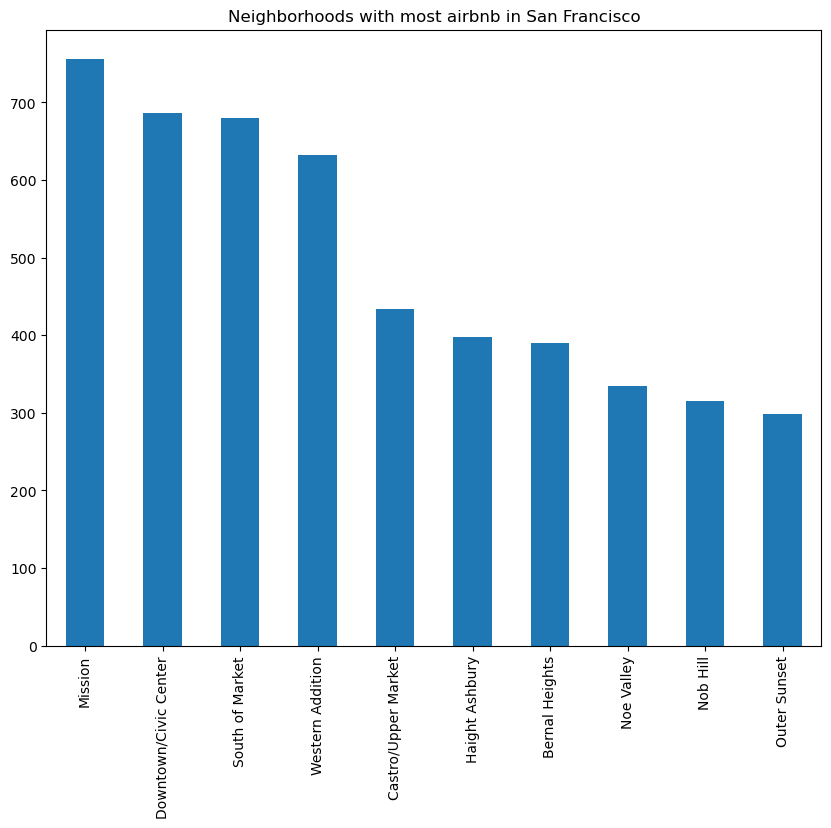

In [65]:
#barplot of top 10 airbnb neighborhoods in sanfrancisco
top_10 = SF_Data['neighbourhood_cleansed'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Neighborhoods with most airbnb in San Francisco')

In [66]:
#review_scores_rating missing values
#number of missing values in column neighbourhood_cleansed
SF_Data['review_scores_rating'].isna().sum()

1651

In [69]:
#replace missing value with the median
SF_Data.fillna(SF_Data.median(numeric_only=True).round(1), inplace=True)

In [70]:
#review_scores_rating
rs_rating_by_neighbourhood_cleansed = SF_Data.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
rs_rating_by_neighbourhood_cleansed

neighbourhood_cleansed
Bayview                  94.829268
Bernal Heights           96.920513
Castro/Upper Market      97.847926
Chinatown                95.647059
Crocker Amazon           93.300000
Diamond Heights          98.176471
Downtown/Civic Center    92.736152
Excelsior                95.391061
Financial District       96.207650
Glen Park                97.492308
Golden Gate Park         95.750000
Haight Ashbury           95.944724
Inner Richmond           95.239437
Inner Sunset             96.751445
Lakeshore                94.848485
Marina                   96.313131
Mission                  96.455026
Nob Hill                 95.000000
Noe Valley               97.134731
North Beach              95.867052
Ocean View               95.955556
Outer Mission            96.148352
Outer Richmond           95.989130
Outer Sunset             95.506711
Pacific Heights          96.751592
Parkside                 96.613636
Potrero Hill             97.379032
Presidio                 97.0000

In [ ]:
#top 10 most rated neighborhoods
rs_rating_by_neighbourhood_cleansed.sort_values("Frequency",ascending=False)
top_10 = SF_Data['neighbourhood_cleansed'].value_counts()[:10]
top_10.plot(kind='bar',figsize=(10,8))
plt.title('Neighborhoods with most airbnb in San Francisco')

Q3. Difference of number of reviews mean by superhost

Q3.1 Data Preparation

In [95]:
#check if number_of_reviews_ltm and host_is_superhost has missing values
SF_Data['number_of_reviews_ltm'].isna().sum()

0

In [97]:
#check if number_of_reviews_ltm and host_is_superhost has missing values
SF_Data['host_is_superhost'].isna().sum()

8

In [96]:
#check if there is a huge difference of number of reviews by whether the host is super host or not.
SF_Data.groupby('host_is_superhost')['number_of_reviews_ltm'].mean()

host_is_superhost
f     7.225148
t    21.961647
Name: number_of_reviews_ltm, dtype: float64